In [1]:
import pandas as pd
import numpy as np
import sklearn
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import os
import torchvision
import torch.nn.functional as F

In [4]:
# image = Image.open("Com damage/WIN_20230927_12_46_00_Pro.jpg")
# image = image.resize((200,200))
# pixels = np.array(image)
# arr = []
# for i in pixels:
#     for j in i:
#         arr.append(sum(j)/3)

In [36]:
defects = os.listdir("Resin under fill")
perfect = os.listdir("good pieces")

In [37]:
df = {"Good":[],"Resin Defective":[]}

In [38]:
for i in defects:
    image = Image.open("Resin under fill/"+i)
    image = image.resize((200,200))
    pixels = np.array(image)
    arr = []
    for k in pixels:
        for j in k:
            arr.append(sum(j)/3)
    df["Resin Defective"].append(arr)
for i in perfect:
    image = Image.open("good pieces/"+i)
    image = image.resize((200,200))
    pixels = np.array(image)
    arr = []
    for k in pixels:
        for j in k:
            arr.append(sum(j)/3)
    df["Good"].append(arr)

In [8]:
df["Good"][0]

[15.333333333333334,
 15.333333333333334,
 15.666666666666666,
 16.0,
 16.0,
 15.333333333333334,
 15.333333333333334,
 15.666666666666666,
 16.0,
 16.0,
 15.333333333333334,
 15.333333333333334,
 15.333333333333334,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.333333333333332,
 17.0,
 17.0,
 16.333333333333332,
 16.0,
 16.0,
 16.0,
 16.0,
 15.333333333333334,
 15.333333333333334,
 15.333333333333334,
 15.0,
 15.0,
 15.333333333333334,
 15.333333333333334,
 16.0,
 24.0,
 39.333333333333336,
 57.333333333333336,
 73.33333333333333,
 75.33333333333333,
 66.66666666666667,
 51.666666666666664,
 43.666666666666664,
 33.666666666666664,
 37.333333333333336,
 42.0,
 28.0,
 31.0,
 28.0,
 30.666666666666668,
 28.666666666666668,
 26.666666666666668,
 20.0,
 21.333333333333332,
 22.333333333333332,
 22.333333333333332,
 23.666666666666668,
 27.0,
 27.666666666666668,
 26.333333333333332,
 26.333333333333332,
 30.0,
 30.666666666666668,
 3

In [39]:
dataset = {}
for i in range(40000):
    dataset[i] = []
dataset["class"] = []

In [40]:
for i in df.keys():
    for j in df[i]:
        for k in range(40000):
            dataset[k].append(j[k])
        dataset["class"].append(i)

In [12]:
dataset

{0: [15.333333333333334,
  16.0,
  15.333333333333334,
  15.333333333333334,
  14.333333333333334,
  15.333333333333334,
  14.333333333333334,
  15.0,
  15.333333333333334,
  15.0,
  86.0,
  104.66666666666667,
  25.333333333333332,
  30.666666666666668,
  16.666666666666668,
  30.666666666666668,
  35.666666666666664,
  22.666666666666668,
  33.333333333333336,
  25.333333333333332,
  37.333333333333336,
  38.333333333333336,
  98.66666666666667,
  53.333333333333336,
  16.333333333333332,
  15.666666666666666,
  17.0,
  16.333333333333332,
  18.0,
  21.0,
  52.0,
  16.0,
  15.333333333333334,
  15.0,
  15.333333333333334,
  15.333333333333334,
  16.0,
  16.333333333333332,
  15.333333333333334,
  16.0,
  16.0,
  15.333333333333334,
  15.333333333333334,
  15.0,
  16.0,
  16.0,
  15.333333333333334,
  16.0,
  15.333333333333334,
  16.0,
  16.0,
  15.333333333333334,
  15.333333333333334,
  15.333333333333334,
  46.333333333333336,
  26.0,
  69.33333333333333,
  79.0,
  49.0,
  40.3333

In [41]:
data = pd.DataFrame(dataset)

In [42]:
data

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,class
0,15.333333,15.333333,15.666667,16.000000,16.000000,15.333333,15.333333,15.666667,16.000000,16.000000,...,45.333333,31.666667,47.000000,74.333333,70.333333,67.000000,62.333333,58.666667,55.000000,Good
1,16.000000,16.000000,15.666667,15.333333,15.333333,16.333333,16.333333,15.333333,15.666667,17.000000,...,87.000000,84.000000,83.000000,83.666667,74.000000,43.000000,33.333333,38.666667,61.333333,Good
2,15.333333,15.333333,15.000000,14.333333,14.333333,15.333333,15.333333,15.333333,15.333333,15.333333,...,54.666667,36.666667,31.666667,44.000000,44.000000,36.666667,35.333333,30.000000,28.000000,Good
3,15.333333,15.333333,15.333333,15.333333,15.333333,15.333333,15.333333,15.333333,15.666667,15.666667,...,47.666667,48.666667,48.000000,36.000000,27.666667,35.000000,34.000000,27.666667,26.000000,Good
4,14.333333,14.333333,15.000000,25.333333,46.333333,52.000000,28.000000,15.333333,15.666667,13.666667,...,37.666667,35.000000,35.333333,34.666667,34.666667,43.666667,42.333333,29.666667,24.000000,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,54.000000,61.333333,55.666667,46.000000,43.666667,45.333333,43.333333,42.333333,41.333333,45.000000,...,19.333333,20.000000,20.333333,20.666667,21.000000,20.333333,19.333333,19.000000,19.000000,Resin Defective
149,67.666667,68.333333,54.666667,46.666667,44.333333,43.000000,45.000000,46.000000,46.000000,40.666667,...,21.333333,21.666667,20.000000,21.333333,21.333333,21.000000,19.666667,20.333333,18.666667,Resin Defective
150,45.666667,46.333333,46.666667,43.000000,43.333333,40.333333,38.000000,36.666667,43.000000,48.666667,...,19.333333,19.333333,19.000000,19.666667,18.666667,20.333333,21.000000,21.333333,19.000000,Resin Defective
151,15.000000,17.000000,20.000000,23.000000,57.000000,106.333333,114.666667,111.000000,107.333333,105.000000,...,18.000000,16.666667,16.000000,18.000000,17.000000,18.333333,18.666667,18.000000,19.333333,Resin Defective


In [43]:
data.to_csv("resin_damage.csv")

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [45]:
x = data.iloc[:,0:40000]
x

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,15.333333,15.333333,15.666667,16.000000,16.000000,15.333333,15.333333,15.666667,16.000000,16.000000,...,80.000000,45.333333,31.666667,47.000000,74.333333,70.333333,67.000000,62.333333,58.666667,55.000000
1,16.000000,16.000000,15.666667,15.333333,15.333333,16.333333,16.333333,15.333333,15.666667,17.000000,...,85.000000,87.000000,84.000000,83.000000,83.666667,74.000000,43.000000,33.333333,38.666667,61.333333
2,15.333333,15.333333,15.000000,14.333333,14.333333,15.333333,15.333333,15.333333,15.333333,15.333333,...,55.666667,54.666667,36.666667,31.666667,44.000000,44.000000,36.666667,35.333333,30.000000,28.000000
3,15.333333,15.333333,15.333333,15.333333,15.333333,15.333333,15.333333,15.333333,15.666667,15.666667,...,47.666667,47.666667,48.666667,48.000000,36.000000,27.666667,35.000000,34.000000,27.666667,26.000000
4,14.333333,14.333333,15.000000,25.333333,46.333333,52.000000,28.000000,15.333333,15.666667,13.666667,...,42.000000,37.666667,35.000000,35.333333,34.666667,34.666667,43.666667,42.333333,29.666667,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,54.000000,61.333333,55.666667,46.000000,43.666667,45.333333,43.333333,42.333333,41.333333,45.000000,...,19.333333,19.333333,20.000000,20.333333,20.666667,21.000000,20.333333,19.333333,19.000000,19.000000
149,67.666667,68.333333,54.666667,46.666667,44.333333,43.000000,45.000000,46.000000,46.000000,40.666667,...,20.666667,21.333333,21.666667,20.000000,21.333333,21.333333,21.000000,19.666667,20.333333,18.666667
150,45.666667,46.333333,46.666667,43.000000,43.333333,40.333333,38.000000,36.666667,43.000000,48.666667,...,19.000000,19.333333,19.333333,19.000000,19.666667,18.666667,20.333333,21.000000,21.333333,19.000000
151,15.000000,17.000000,20.000000,23.000000,57.000000,106.333333,114.666667,111.000000,107.333333,105.000000,...,18.000000,18.000000,16.666667,16.000000,18.000000,17.000000,18.333333,18.666667,18.000000,19.333333


In [46]:
y = data.loc[:,"class"]
y

0                 Good
1                 Good
2                 Good
3                 Good
4                 Good
            ...       
148    Resin Defective
149    Resin Defective
150    Resin Defective
151    Resin Defective
152    Resin Defective
Name: class, Length: 153, dtype: object

In [47]:
enc = LabelEncoder()
y_new = enc.fit_transform(y)
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
scaler = StandardScaler()
x_new = scaler.fit_transform(x)
x_new

array([[-0.56660033, -0.56757856, -0.55818634, ...,  7.05585307,
         6.97036478,  5.74061566],
       [-0.53310347, -0.53415304, -0.55818634, ...,  2.50676559,
         3.60859381,  6.70079804],
       [-0.56660033, -0.56757856, -0.59352044, ...,  2.82049576,
         2.15182639,  1.64720658],
       ...,
       [ 0.95750638,  0.98670846,  1.08484913, ...,  0.57209619,
         0.69505897,  0.28273688],
       [-0.58334875, -0.48401474, -0.32851472, ...,  0.20607766,
         0.1347638 ,  0.3332728 ],
       [ 1.86192135,  2.84182523,  3.62890404, ..., -0.15994087,
        -0.59361991, -0.52583775]])

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2)

In [106]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
y_pred = model.predict(x_test)

In [108]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0])

In [109]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0])

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [111]:
accuracy_score(y_test,y_pred)

0.9354838709677419

In [112]:
precision_score(y_test,y_pred)

0.9629629629629629

In [113]:
recall_score(y_test,y_pred)

0.9629629629629629

In [114]:
f1_score(y_test,y_pred)

0.9629629629629629

In [115]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0])

In [116]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0])

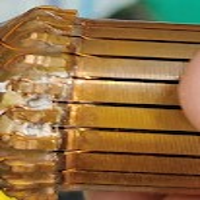

In [117]:
image = Image.open("defect1.jpg")
image = image.resize((200,200))
pixels = np.array(image)
arr = []
for i in pixels:
    for j in i:
        arr.append(sum(j)/3)
image

In [118]:
arr = np.array(arr)

In [119]:
arr_new = scaler.transform(arr.reshape(1,-1))

In [120]:
enc.inverse_transform(model.predict(arr_new))[0]

'Resin Defective'